<a href="https://colab.research.google.com/github/joshiakshada0404/Sales_Analysis_Using_pandas/blob/main/Sales_Analysis_In_Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sales Analysis Using Pandas

In [1]:
## necessary libraries

import pandas as pd
import os
import matplotlib.pyplot as plt


TASK1: merging 12 months of sales data into one csv file

In [2]:
!unzip Sales_Data.zip

Archive:  Sales_Data.zip
  inflating: Sales_Data/Sales_April_2019.csv  
  inflating: Sales_Data/Sales_August_2019.csv  
  inflating: Sales_Data/Sales_December_2019.csv  
  inflating: Sales_Data/Sales_February_2019.csv  
  inflating: Sales_Data/Sales_January_2019.csv  
  inflating: Sales_Data/Sales_July_2019.csv  
  inflating: Sales_Data/Sales_June_2019.csv  
  inflating: Sales_Data/Sales_March_2019.csv  
  inflating: Sales_Data/Sales_May_2019.csv  
  inflating: Sales_Data/Sales_November_2019.csv  
  inflating: Sales_Data/Sales_October_2019.csv  
  inflating: Sales_Data/Sales_September_2019.csv  


In [3]:
files = {file for file in os.listdir('./Sales_Data') }

for file in files :
  print(file)

Sales_August_2019.csv
Sales_September_2019.csv
Sales_April_2019.csv
Sales_November_2019.csv
Sales_February_2019.csv
Sales_July_2019.csv
Sales_December_2019.csv
Sales_March_2019.csv
Sales_January_2019.csv
Sales_October_2019.csv
Sales_June_2019.csv
Sales_May_2019.csv


In [4]:
all_months_data = pd.DataFrame()

for file in files :
  df = pd.read_csv("./Sales_Data/"+file)
  all_months_data = pd.concat([all_months_data,df])

all_months_data.head()
all_months_data.to_csv("all_data.csv", index = False)

In [5]:
# Reading in updated dataframe 

all_data = pd.read_csv('all_data.csv')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,236670,Wired Headphones,2,11.99,08/31/19 22:21,"359 Spruce St, Seattle, WA 98101"
1,236671,Bose SoundSport Headphones,1,99.99,08/15/19 15:11,"492 Ridge St, Dallas, TX 75001"
2,236672,iPhone,1,700.0,08/06/19 14:40,"149 7th St, Portland, OR 97035"
3,236673,AA Batteries (4-pack),2,3.84,08/29/19 20:59,"631 2nd St, Los Angeles, CA 90001"
4,236674,AA Batteries (4-pack),2,3.84,08/15/19 19:53,"736 14th St, New York City, NY 10001"


### Cleaning up the data

Dropping rows of NAN

In [6]:
nan_df = all_data[all_data.isna().any(axis=1)]
nan_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
312,NaN,NaN,NaN,NaN,NaN,NaN
1222,NaN,NaN,NaN,NaN,NaN,NaN
2648,NaN,NaN,NaN,NaN,NaN,NaN
2685,NaN,NaN,NaN,NaN,NaN,NaN
3119,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
all_data = all_data.dropna(how = 'all')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,236670,Wired Headphones,2,11.99,08/31/19 22:21,"359 Spruce St, Seattle, WA 98101"
1,236671,Bose SoundSport Headphones,1,99.99,08/15/19 15:11,"492 Ridge St, Dallas, TX 75001"
2,236672,iPhone,1,700.0,08/06/19 14:40,"149 7th St, Portland, OR 97035"
3,236673,AA Batteries (4-pack),2,3.84,08/29/19 20:59,"631 2nd St, Los Angeles, CA 90001"
4,236674,AA Batteries (4-pack),2,3.84,08/15/19 19:53,"736 14th St, New York City, NY 10001"


 Invalid literal for int() with base 10: 'Or'   -  Find or and delete it


In [8]:
temp_df = all_data[all_data['Order Date'].str[0:2] =='Or']
temp_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
211,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
243,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1291,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1412,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1427,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [9]:
all_data = all_data[all_data['Order Date'].str[0:2] != 'Or']

### Convert columns to the correct type

In [10]:
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered']) # make int 
all_data['Price Each'] =pd.to_numeric(all_data['Price Each']) # make float

In [11]:
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])

### Agumnet data with additional columns

In [12]:
## Add Month Column
all_data.info()
# order date is of type object that is why this is not running --- all_data['month'] = pd.DatetimeIndex(all_data['Order Date']).month

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          185950 non-null  object        
 1   Product           185950 non-null  object        
 2   Quantity Ordered  185950 non-null  int64         
 3   Price Each        185950 non-null  float64       
 4   Order Date        185950 non-null  datetime64[ns]
 5   Purchase Address  185950 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 9.9+ MB


In [13]:
# Add Sales Column

all_data['Sales'] = all_data['Quantity Ordered'] * all_data['Price Each']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales
0,236670,Wired Headphones,2,11.99,2019-08-31 22:21:00,"359 Spruce St, Seattle, WA 98101",23.98
1,236671,Bose SoundSport Headphones,1,99.99,2019-08-15 15:11:00,"492 Ridge St, Dallas, TX 75001",99.99
2,236672,iPhone,1,700.00,2019-08-06 14:40:00,"149 7th St, Portland, OR 97035",700.00
3,236673,AA Batteries (4-pack),2,3.84,2019-08-29 20:59:00,"631 2nd St, Los Angeles, CA 90001",7.68
4,236674,AA Batteries (4-pack),2,3.84,2019-08-15 19:53:00,"736 14th St, New York City, NY 10001",7.68


In [14]:
# Add City column
def get_state(address):
  return address.split(',')[2].split(' ')[1]

def get_city(address) :
  return address.split(',')[1]


all_data['City_State'] = all_data['Purchase Address'].apply(lambda x: x.split(',')[1] + ' ('+ get_state(x)+ ')')
# x : f "{get_city(x)} ({fet_state(c)})"

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales,City_State
0,236670,Wired Headphones,2,11.99,2019-08-31 22:21:00,"359 Spruce St, Seattle, WA 98101",23.98,Seattle (WA)
1,236671,Bose SoundSport Headphones,1,99.99,2019-08-15 15:11:00,"492 Ridge St, Dallas, TX 75001",99.99,Dallas (TX)
2,236672,iPhone,1,700.00,2019-08-06 14:40:00,"149 7th St, Portland, OR 97035",700.00,Portland (OR)
3,236673,AA Batteries (4-pack),2,3.84,2019-08-29 20:59:00,"631 2nd St, Los Angeles, CA 90001",7.68,Los Angeles (CA)
4,236674,AA Batteries (4-pack),2,3.84,2019-08-15 19:53:00,"736 14th St, New York City, NY 10001",7.68,New York City (NY)


In [17]:
all_data['Month'] = pd.to_datetime(all_data['Order Date']).dt.month
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales,City_State,Month
0,236670,Wired Headphones,2,11.99,2019-08-31 22:21:00,"359 Spruce St, Seattle, WA 98101",23.98,Seattle (WA),8
1,236671,Bose SoundSport Headphones,1,99.99,2019-08-15 15:11:00,"492 Ridge St, Dallas, TX 75001",99.99,Dallas (TX),8
2,236672,iPhone,1,700.00,2019-08-06 14:40:00,"149 7th St, Portland, OR 97035",700.00,Portland (OR),8
3,236673,AA Batteries (4-pack),2,3.84,2019-08-29 20:59:00,"631 2nd St, Los Angeles, CA 90001",7.68,Los Angeles (CA),8
4,236674,AA Batteries (4-pack),2,3.84,2019-08-15 19:53:00,"736 14th St, New York City, NY 10001",7.68,New York City (NY),8


Method2 :


NOTE : 

This was run before cleaning data (While exploring data)
this is one way of making month column too
all_data['Month'] = all_data['Order Date'].str[0:2]
all_data['Month'] = all_data['Month'].astype('int32')

all_data.head()

## Question 1: What was the best month for sales ? How much was earned that month ?

To answer this question we require 
1.  Total sales in each month 

In [18]:
results = all_data.groupby('Month').sum()

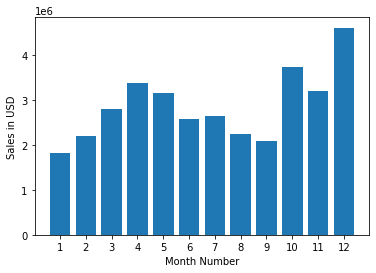

In [19]:
months = range(1,13)

plt.bar(months,results['Sales'])
plt.xticks(months)
plt.ylabel('Sales in USD')
plt.xlabel('Month Number')
plt.show()

## Question 2 : what city had the highest number of sales ?


In [20]:
results = all_data.groupby('City_State').sum()
results

,Quantity Ordered,Price Each,Sales,Month
City_State,,,,
Atlanta (GA),16602,2779908.20,2795498.58,104794
Austin (TX),11153,1809873.61,1819581.75,69829
Boston (MA),22528,3637409.77,3661642.01,141112
Dallas (TX),16730,2752627.82,2767975.40,104620
Los Angeles (CA),33289,5421435.23,5452570.80,208325
New York City (NY),27932,4635370.83,4664317.43,175741
Portland (ME),2750,447189.25,449758.27,17144
Portland (OR),11303,1860558.22,1870732.34,70621
San Francisco (CA),50239,8211461.74,8262203.91,315520


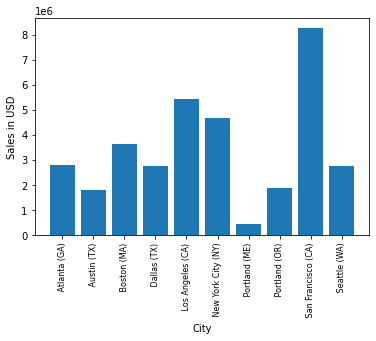

In [22]:
cities = [city for city,df in all_data.groupby('City_State')]

plt.bar(cities,results['Sales'])
plt.xticks(cities, rotation = 'vertical', size = 8)
plt.ylabel('Sales in USD')
plt.xlabel('City')
plt.show()

### Question3 : What time should we display advertisements to maximize likelihood of customer's buying product ?

In [23]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales,City_State,Month
0,236670,Wired Headphones,2,11.99,2019-08-31 22:21:00,"359 Spruce St, Seattle, WA 98101",23.98,Seattle (WA),8
1,236671,Bose SoundSport Headphones,1,99.99,2019-08-15 15:11:00,"492 Ridge St, Dallas, TX 75001",99.99,Dallas (TX),8
2,236672,iPhone,1,700.00,2019-08-06 14:40:00,"149 7th St, Portland, OR 97035",700.00,Portland (OR),8
3,236673,AA Batteries (4-pack),2,3.84,2019-08-29 20:59:00,"631 2nd St, Los Angeles, CA 90001",7.68,Los Angeles (CA),8
4,236674,AA Batteries (4-pack),2,3.84,2019-08-15 19:53:00,"736 14th St, New York City, NY 10001",7.68,New York City (NY),8


In [24]:
all_data['Hour'] = all_data['Order Date'].dt.hour
all_data['Minute'] = all_data['Order Date'].dt.minute
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales,City_State,Month,Hour,Minute
0,236670,Wired Headphones,2,11.99,2019-08-31 22:21:00,"359 Spruce St, Seattle, WA 98101",23.98,Seattle (WA),8,22,21
1,236671,Bose SoundSport Headphones,1,99.99,2019-08-15 15:11:00,"492 Ridge St, Dallas, TX 75001",99.99,Dallas (TX),8,15,11
2,236672,iPhone,1,700.00,2019-08-06 14:40:00,"149 7th St, Portland, OR 97035",700.00,Portland (OR),8,14,40
3,236673,AA Batteries (4-pack),2,3.84,2019-08-29 20:59:00,"631 2nd St, Los Angeles, CA 90001",7.68,Los Angeles (CA),8,20,59
4,236674,AA Batteries (4-pack),2,3.84,2019-08-15 19:53:00,"736 14th St, New York City, NY 10001",7.68,New York City (NY),8,19,53


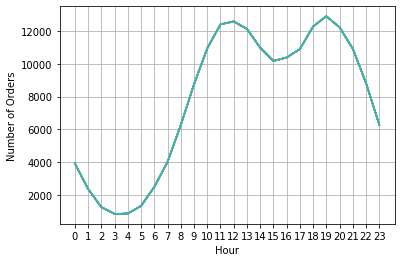

In [25]:
hours = [hour for hour,df in all_data.groupby('Hour')]

plt.plot(hours,all_data.groupby(['Hour']).count())
plt.xticks(hours)
plt.xlabel('Hour')
plt.ylabel('Number of Orders')
plt.grid()
plt.show()

### Question 4 : What products are most often sold together ?


We can think of like if order id is same then it is sure that it was sold together to the customer.

In [26]:
df = all_data[all_data['Order ID'].duplicated(keep = False)]   # keep all the duplicate
df.head(20)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales,City_State,Month,Hour,Minute
46,236716,AA Batteries (4-pack),2,3.84,2019-08-17 20:12:00,"84 Cedar St, San Francisco, CA 94016",7.68,San Francisco (CA),8,20,12
47,236716,USB-C Charging Cable,1,11.95,2019-08-17 20:12:00,"84 Cedar St, San Francisco, CA 94016",11.95,San Francisco (CA),8,20,12
60,236729,iPhone,1,700.00,2019-08-09 09:28:00,"635 Lake St, San Francisco, CA 94016",700.00,San Francisco (CA),8,9,28
61,236729,Apple Airpods Headphones,1,150.00,2019-08-09 09:28:00,"635 Lake St, San Francisco, CA 94016",150.00,San Francisco (CA),8,9,28
62,236730,Google Phone,1,600.00,2019-08-02 10:17:00,"445 Lincoln St, New York City, NY 10001",600.00,New York City (NY),8,10,17
63,236730,Wired Headphones,1,11.99,2019-08-02 10:17:00,"445 Lincoln St, New York City, NY 10001",11.99,New York City (NY),8,10,17
132,236799,Google Phone,1,600.00,2019-08-01 12:38:00,"309 2nd St, San Francisco, CA 94016",600.00,San Francisco (CA),8,12,38
133,236799,Wired Headphones,1,11.99,2019-08-01 12:38:00,"309 2nd St, San Francisco, CA 94016",11.99,San Francisco (CA),8,12,38
163,236829,Vareebadd Phone,1,400.00,2019-08-16 08:51:00,"27 2nd St, Los Angeles, CA 90001",400.00,Los Angeles (CA),8,8,51
164,236829,USB-C Charging Cable,1,11.95,2019-08-16 08:51:00,"27 2nd St, Los Angeles, CA 90001",11.95,Los Angeles (CA),8,8,51


In [27]:
df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
df.head()

<ipython-input-27-fe9ddc098ab3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales,City_State,Month,Hour,Minute,Grouped
46,236716,AA Batteries (4-pack),2,3.84,2019-08-17 20:12:00,"84 Cedar St, San Francisco, CA 94016",7.68,San Francisco (CA),8,20,12,"AA Batteries (4-pack),USB-C Charging Cable"
47,236716,USB-C Charging Cable,1,11.95,2019-08-17 20:12:00,"84 Cedar St, San Francisco, CA 94016",11.95,San Francisco (CA),8,20,12,"AA Batteries (4-pack),USB-C Charging Cable"
60,236729,iPhone,1,700.00,2019-08-09 09:28:00,"635 Lake St, San Francisco, CA 94016",700.00,San Francisco (CA),8,9,28,"iPhone,Apple Airpods Headphones"
61,236729,Apple Airpods Headphones,1,150.00,2019-08-09 09:28:00,"635 Lake St, San Francisco, CA 94016",150.00,San Francisco (CA),8,9,28,"iPhone,Apple Airpods Headphones"
62,236730,Google Phone,1,600.00,2019-08-02 10:17:00,"445 Lincoln St, New York City, NY 10001",600.00,New York City (NY),8,10,17,"Google Phone,Wired Headphones"


In [28]:
df = df[['Order ID','Grouped']].drop_duplicates()
df.head()


,Order ID,Grouped
46,236716,"AA Batteries (4-pack),USB-C Charging Cable"
60,236729,"iPhone,Apple Airpods Headphones"
62,236730,"Google Phone,Wired Headphones"
132,236799,"Google Phone,Wired Headphones"
163,236829,"Vareebadd Phone,USB-C Charging Cable"


In [29]:
from itertools import combinations
from collections import Counter

In [30]:
count = Counter()

for row in df['Grouped'] :
  row_list = row.split(',')
  count.update(Counter(combinations(row_list,2)))

for key, value in count.most_common(10) :
  print(key,value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


### Question 5: What product sold the most? Why do you think it sold the most ? 

In [31]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales,City_State,Month,Hour,Minute
0,236670,Wired Headphones,2,11.99,2019-08-31 22:21:00,"359 Spruce St, Seattle, WA 98101",23.98,Seattle (WA),8,22,21
1,236671,Bose SoundSport Headphones,1,99.99,2019-08-15 15:11:00,"492 Ridge St, Dallas, TX 75001",99.99,Dallas (TX),8,15,11
2,236672,iPhone,1,700.00,2019-08-06 14:40:00,"149 7th St, Portland, OR 97035",700.00,Portland (OR),8,14,40
3,236673,AA Batteries (4-pack),2,3.84,2019-08-29 20:59:00,"631 2nd St, Los Angeles, CA 90001",7.68,Los Angeles (CA),8,20,59
4,236674,AA Batteries (4-pack),2,3.84,2019-08-15 19:53:00,"736 14th St, New York City, NY 10001",7.68,New York City (NY),8,19,53


In [32]:
product_group = all_data.groupby('Product')
product_group.sum()

,Quantity Ordered,Price Each,Sales,Month,Hour,Minute
Product,,,,,,
20in Monitor,4129,451068.99,454148.71,29336,58764,122252
27in 4K Gaming Monitor,6244,2429637.70,2435097.56,44440,90916,184331
27in FHD Monitor,7550,1125974.93,1132424.50,52558,107540,219948
34in Ultrawide Monitor,6199,2348718.19,2355558.01,43304,89076,183480
AA Batteries (4-pack),27635,79015.68,106118.40,145558,298342,609039
AAA Batteries (4-pack),31017,61716.59,92740.83,146370,297332,612113
Apple Airpods Headphones,15661,2332350.00,2349150.00,109477,223304,455570
Bose SoundSport Headphones,13457,1332366.75,1345565.43,94113,192445,392603
Flatscreen TV,4819,1440000.00,1445700.00,34224,68815,142789


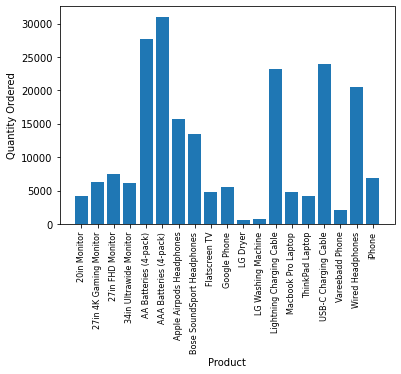

In [33]:
quantity_ordered = product_group.sum()['Quantity Ordered']

products = [product for product, df in product_group]

plt.bar(products,quantity_ordered)
plt.xticks(products, rotation= 'vertical',size =8)
plt.ylabel('Quantity Ordered')
plt.xlabel('Product')
plt.show()

Finding is their any corelation between quantity ordered of products with the price 

In [34]:
prices = all_data.groupby('Product').mean()['Price Each']
print(prices)

Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price Each, dtype: float64


<ipython-input-37-e54b4904fe7c>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(products,rotation ='vertical',size=8)


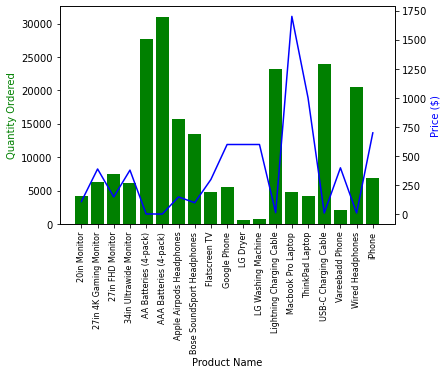

In [37]:
# ploting 2 y-axis in the same plot

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(products,quantity_ordered,color ='g')
ax2.plot(products,prices,'b-')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color ='g')
ax2.set_ylabel('Price ($)',color ='b')
ax1.set_xticklabels(products,rotation ='vertical',size=8)

plt.show()